In [ ]:
# sabse pehle aik simple sequncial worflow banaya hai jisme aik function hai jo weight aur height ko le kar BMI calculate karta hai.
#  Phir is workflow ko execute karte hain aur result dekhte hain.

In [8]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [9]:
# define state
class BMIState(TypedDict):
    weight_kg: float  # in kilograms
    height_m: float  # in meters
    bmi: float     # body mass index

In [ ]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight_kg'] # weight value
    height = state['height_m']   # height value 
    bmi = weight / (height ** 2) # calculate bmi
    state['bmi'] = round(bmi,2)  # partial update the bmi calculated value upto 2 decimal places
    return state

In [14]:
# define your graph
graph = StateGraph(BMIState)

# add your nodes to your graph
graph.add_node("Calculate BMI", calculate_bmi)  

# add your edges to your graph
graph.add_edge(START, "Calculate BMI") # graph starts with START and gets to Calculate BMI node
graph.add_edge("Calculate BMI", END) # then calculates BMI and ends at END

# compile the graph
workflow = graph.compile()


In [15]:
# execute the graph
workflow.invoke({"weight_kg": 70, "height_m": 1.75})

{'weight_kg': 70, 'height_m': 1.75, 'bmi': 22.86}

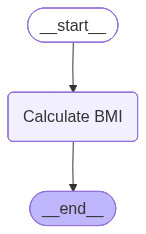

In [ ]:
# ab hum is workflow ko visualize karte hain taake hum dekh saken ke humara workflow kaisa lagta hai.
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [18]:
# ab hum is workflow ko thoda complex banate hain jisme hum aik aur function add karte hain jo BMI
#  ke basis par health status determine karta hai.

In [33]:
# define state
class BMIStateComplex(TypedDict):
    weight_kg: float  # in kilograms
    height_m: float  # in meters
    bmi: float     # body mass index
    category: str

In [34]:
def label_bmi(state: BMIStateComplex) -> BMIStateComplex:
    bmi = state['bmi'] # extract bmi value from last node
    if bmi < 18.5:
        category = "Underweight"
    elif 18.5 <= bmi < 24.9:
        category = "Normal weight"
    elif 25 <= bmi < 29.9:
        category = "Overweight"
    else:
        category = "Obese"
    state['category'] = category
    return state

In [35]:
def calculate_bmi(state: BMIStateComplex) -> BMIStateComplex:
    weight = state['weight_kg'] # weight value
    height = state['height_m']   # height value 
    bmi = weight / (height ** 2) # calculate bmi
    state['bmi'] = round(bmi,2)  # partial update the bmi calculated value upto 2 decimal places
    return state

In [36]:
# define your graph
graph = StateGraph(BMIStateComplex)

# add your nodes to your graph
graph.add_node("Calculate BMI", calculate_bmi)  
graph.add_node("label_bmi",label_bmi)

# add your edges to your graph
graph.add_edge(START, "Calculate BMI") # graph starts with START and gets to Calculate BMI node
graph.add_edge("Calculate BMI", "label_bmi") # then calculates BMI and goes to label_bmi node
graph.add_edge("label_bmi", END) # then labels bmi category and ends at

# compile the graph
workflow = graph.compile()


In [37]:
# execute the graph

initial_state = {"weight_kg": 60, "height_m": 1.64}

final_state = workflow.invoke(initial_state)

print(final_state)

{'weight_kg': 60, 'height_m': 1.64, 'bmi': 22.31, 'category': 'Normal weight'}


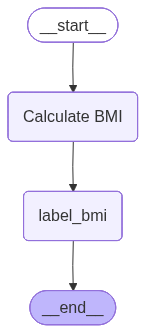

In [27]:
# ab hum is workflow ko visualize karte hain taake hum dekh saken ke humara workflow kaisa lagta hai.
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())